<h1 align="center"> Clustering Models</h1>
<h3 align="center"> Evan Ditter </h3>
<h3 align="center">April 8th, 2019</h3>

## Overview

In this lab, I will explore several different clustering algorithms on the World Happiness Report dataset. This dataset has a response variable of a Happiness Score that is between 0.0 (lowest) and 10.0 (highest). The other attributes being used are 
Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Dystopia Residual.These attributes will be used as predictors for the response Happiness Score.

In the lab I will compare the following clustering models:  
* K-means
* Agglomerative Clustering
* Affinity Propagation
* Gaussian Mixture

I will then visualize and evaluate each model on the given dataset and make conclusions on each model.

(Note: Sometimes the colors changed when running the models for the different clusters, if this occured simply look at the cluster number and not the color.)   

**References**:  
https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python/notebook  
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1  
https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-agglomerative-clustering-1.html  
https://medium.com/clustering-with-gaussian-mixture-model/clustering-with-gaussian-mixture-model-c695b6cd60da  

## Data
The data used is from the World Happiness Report landmark survey. This report finds the status of global happiness and takes attributes people might think correlate with happiness. Some of these include country, wealth, trust, freedom, family, and generosity.

The different clustering models used:

**k-means** - The objective of K-means is to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset where a cluster refers to a collection of data points aggregated together because of certain similarities.

**Agglomerative Clustering** - Agglomerative Clustering is a hierarchical clustering bottom-up algorithm. Bottom-up algorithms treat each document as a singleton cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all documents.

**Affinity Propagation** - A clustering algorithm based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means, affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm. Similar to k-medoids, affinity propagation finds "exemplars", members of the input set that are representative of clusters.

**Gaussian Mixture** - Gaussian Mixture is like k-means but rather than identifying clusters by “nearest” centroids, I fit a set of k gaussians to the data and estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point I can calculate the probabilities of it belonging to each of the clusters.

In [2]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
# import plotly.plotly as py #For World Map
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys      

wh = pd.read_csv("2016.csv") #Read the dataset
wh.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


Above shows the description of the dataset on happiness. Happiness score is the one I care the most about with the max happiness score being 10.0 and the minimum is 0. The other attributes will be used to try to see which correlates the highest with the happiness score.

Below I will output the datatypes of the different attributes.

In [4]:
# Shows the datatypes of the different attributes in the dataset
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

## Exploratory Data Analysis

As a baseline, I will output how the different attributes correlate with Happiness Score. The lighter colors show a correlation of 1.0 and the darkest colors show a correlation of 0. As can be seen from the plot below, Economy (GDP per Capita), Family, and Health (Life Expectancy) have the highest correlation with the Happiness Score. Generosity and Trust (Government Corruption) are the two least correlated attributes in the dataset. 

Most of the analysis will occur in the models section after each of the models.

Below I am creating four identical dataframs to use for each of the models. The heat map shows the correlation between the different attributes.

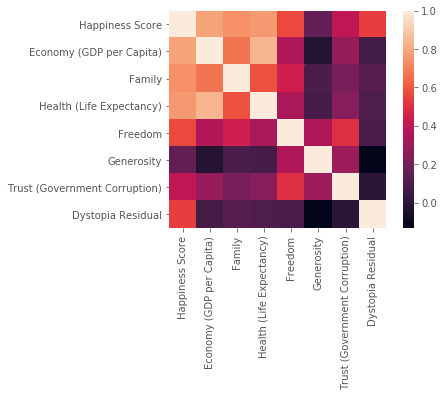

In [45]:
wh1 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [34]:
wh2 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh2.corr() #Calculate the correlation of the above variables

In [35]:
wh3 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh3.corr() #Calculate the correlation of the above variables

In [40]:
wh4 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh4.corr() #Calculate the correlation of the above variables

In [6]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 1.88379206,  1.1862989 ,  1.39218336, ...,  0.89309199,
         2.77282187,  0.76520031],
       [ 1.86885399,  1.39430839,  1.32259655, ...,  0.28647245,
         2.47919242,  0.68238663],
       [ 1.86182431,  1.14953556,  1.46560684, ...,  1.7561448 ,
         0.10955759,  0.93537909],
       ...,
       [-1.82700053, -1.63550608, -2.98516507, ..., -0.50600309,
        -0.19653981, -0.3522848 ],
       [-2.03261868, -0.50255339, -2.42598809, ...,  1.81007154,
         0.3135623 , -2.7899043 ],
       [-2.17672713, -2.15320779, -2.10340624, ..., -0.29802139,
        -0.39241324, -0.41030618]])

In [41]:
ss.fit_transform(wh2)

array([[ 1.88379206,  1.1862989 ,  1.39218336, ...,  0.89309199,
         2.77282187,  0.76520031],
       [ 1.86885399,  1.39430839,  1.32259655, ...,  0.28647245,
         2.47919242,  0.68238663],
       [ 1.86182431,  1.14953556,  1.46560684, ...,  1.7561448 ,
         0.10955759,  0.93537909],
       ...,
       [-1.82700053, -1.63550608, -2.98516507, ..., -0.50600309,
        -0.19653981, -0.3522848 ],
       [-2.03261868, -0.50255339, -2.42598809, ...,  1.81007154,
         0.3135623 , -2.7899043 ],
       [-2.17672713, -2.15320779, -2.10340624, ..., -0.29802139,
        -0.39241324, -0.41030618]])

In [42]:
ss.fit_transform(wh3)

array([[ 1.88379206,  1.1862989 ,  1.39218336, ...,  0.89309199,
         2.77282187,  0.76520031],
       [ 1.86885399,  1.39430839,  1.32259655, ...,  0.28647245,
         2.47919242,  0.68238663],
       [ 1.86182431,  1.14953556,  1.46560684, ...,  1.7561448 ,
         0.10955759,  0.93537909],
       ...,
       [-1.82700053, -1.63550608, -2.98516507, ..., -0.50600309,
        -0.19653981, -0.3522848 ],
       [-2.03261868, -0.50255339, -2.42598809, ...,  1.81007154,
         0.3135623 , -2.7899043 ],
       [-2.17672713, -2.15320779, -2.10340624, ..., -0.29802139,
        -0.39241324, -0.41030618]])

In [43]:
ss.fit_transform(wh4)

array([[ 1.88379206,  1.1862989 ,  1.39218336, ...,  0.89309199,
         2.77282187,  0.76520031],
       [ 1.86885399,  1.39430839,  1.32259655, ...,  0.28647245,
         2.47919242,  0.68238663],
       [ 1.86182431,  1.14953556,  1.46560684, ...,  1.7561448 ,
         0.10955759,  0.93537909],
       ...,
       [-1.82700053, -1.63550608, -2.98516507, ..., -0.50600309,
        -0.19653981, -0.3522848 ],
       [-2.03261868, -0.50255339, -2.42598809, ...,  1.81007154,
         0.3135623 , -2.7899043 ],
       [-2.17672713, -2.15320779, -2.10340624, ..., -0.29802139,
        -0.39241324, -0.41030618]])

The above code standardized the data.

## Models

The models section will include the four clustering algorithms mentioned in the Overview and Data sections. After each model, I will visualize the output and evaluate how well the model performs.

### k-means clustering

The first model I will explore is the basic k-means clustering algorithm. I will define the number of clusters to be 3 and will use this for the following models as well (except Affinity Propagation where you don't specify number of clusters). The clusters are formed based on the closeness to the center value of the clusters. The initial center value will be chosen at random. K-means clustering is a top-down approach which means I first decide the number of clusters (k) and then will group data points into the k clusters.

In [50]:
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 3)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

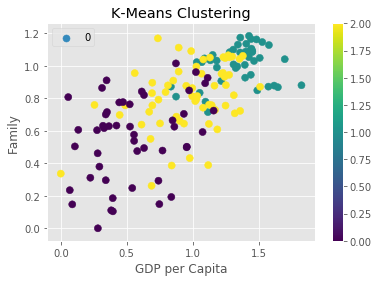

In [51]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Family'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Family')
ax.legend(kmeans)
plt.colorbar(scatter)

Purple - 0  
Blue - 1  
Yellow - 2  

The above plot shows the three different resulting clusters from the k-means clustering algorithm. You could uncomment and run the code below to see how each instance was classified as a 0, 1, or 2 cluster. I chose Family and GDP per Capita to use on the axis as they were seen to be the top two predictors from the initial analysis in the Exploratory Data Analysis section. I was expecting a positive correlation between the two attributes as they both were seen to be good indicators of the happiness score. As can be seen, as the Family score increases so does the GDP per Capita score and thus overall Happiness Score. It can also be seen from the clusters that Family and GDP per Capita are also closely correlated as one goes up the other happens to go up. 

In [79]:
# wh1['kmeans3']

In [52]:
# split df into cluster groups
df_heat_k = wh1.filter(['Economy (GDP per Capita)', 'kmeans'], axis=1)
k_grouped = df_heat_k.groupby(['kmeans'], sort=True)
# compute average for each cluster
k_means = k_grouped.mean()
k_means

,Economy (GDP per Capita)
kmeans,
0,0.553709
1,1.341650
2,0.982444


In [53]:
# split df into cluster groups
df_heat_k_f = wh1.filter(['Family', 'kmeans'], axis=1)
k_grouped_f = df_heat_k_f.groupby(['kmeans'], sort=True)
# compute average for each cluster
k_means_f = k_grouped_f.mean()
k_means_f

,Family
kmeans,
0,0.559753
1,1.012502
2,0.816056


The output above shows how the average GDP per Capita changes with the different groups in the k-means clustering algorithm as well as the Family values.

From the tables, I can see that group 1 had the highest correlation between the two which was the blue group that also appeared to be the best in the graphical output. Cluster 0 (purple) had the lowest average GDP per Capita and Family which makes sense from the graphical representation. Cluster 2 (yellow) for k-means has values between the other two clusters which makes sense from the graphical representation.

Text(0.5, 1.0, '')

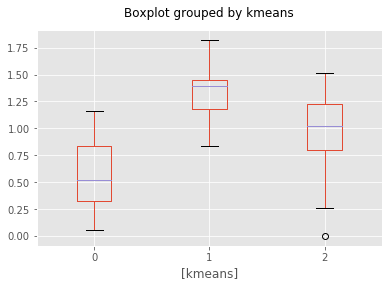

In [54]:
df_boxplot = wh1.filter(['Economy (GDP per Capita)', 'kmeans'], axis=1)

plt.style.use('ggplot')
df_plt = df_boxplot.sort_values(by=['kmeans'])
fig = df_plt.boxplot(by=['kmeans'])
fig.set_title('')

The boxplot shows the different quartiles for each cluster. The blue group which is kmeans group 1 has the smallest difference between its extremes and quartiles which is another measure proving it to be the most accurate and condense cluster whereas the other two groups had the larger differences meaning it seems to be the data is more sparse.

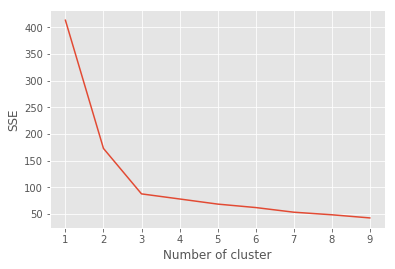

In [55]:
sse = {}
for k in range(1, 10):
    kmeansk = KMeans(n_clusters=k, max_iter=1000).fit(wh1)
   # wh1['TestScore'] = kmeansk.labels_
    #print(data["clusters"])
    sse[k] = kmeansk.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The plot above depicts that the optimal number of clusters for this k-means algorithm is three which reinforces the notation that I should use three clusters. The "elbow" on the arm is the value of optimal k (number of cluster) which in this case is 3.

In [56]:
kmean1 = []
kmean2 = []
kmean3 = []
y = 0
labels_true = wh['Happiness Score']
while y < kmeans.size - 1:
    if kmeans[0][y] == 0:
        kmean1.append(y)
    elif kmeans[0][y] == 1:
        kmean2.append(y)
    else:
        kmean3.append(y)
    y = y + 1


count = 0
k_mean_1 = 0
k_mean_2 = 0
k_mean_3 = 0
while count < len(labels_true):
    if count in kmean1:
        k_mean_1 += labels_true[count]
    elif count in kmean2:
        k_mean_2 += labels_true[count]
    else:
        k_mean_3 += labels_true[count]
    count = count + 1

avg_km1 = k_mean_1 / len(kmean1)
avg_km2 = k_mean_2 / len(kmean2)
avg_km3 = k_mean_3 / len(kmean3)
print("The average Happiness Score for cluster 0: ")
print(avg_km1)
print("The average Happiness Score for cluster 1: ")
print(avg_km2)
print("The average Happiness Score for cluster 2: ")
print(avg_km3)


The average Happiness Score for cluster 0: 
4.065708333333332
The average Happiness Score for cluster 1: 
6.774499999999999
The average Happiness Score for cluster 2: 
5.455193548387095


As can be seen from finding the average Happiness Score for each cluster, cluster 1 performed the best, followed by the 2nd and then the 0th. This coincides with what was predicted with the Family and GDP per Capita attributes.

### Agglomerative Clustering

Agglomerative clustering does not requrie a specific number of clusters, but for this experient I are going to enter in 3 to try to keep the results consistent. Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.

In [61]:
def doAgglomerative(X, nclust=3):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh2, 3)
agglomerative = pd.DataFrame(clust_labels1)
wh2.insert((wh2.shape[1]),'agglomerative',agglomerative)

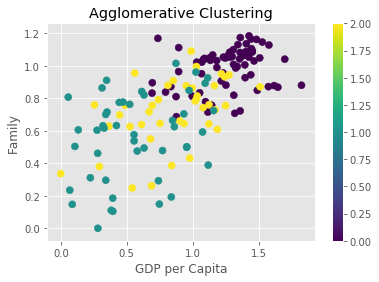

In [62]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh2['Economy (GDP per Capita)'],wh2['Family'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Family')
plt.colorbar(scatter)

Purple - 0  
Blue - 1  
Yellow - 2  

In [63]:
# split df into cluster groups
df_heat_agg = wh2.filter(['Economy (GDP per Capita)', 'agglomerative'], axis=1)
agg_grouped = df_heat_agg.groupby(['agglomerative'], sort=True)
# compute average for each cluster
agg_means = agg_grouped.mean()
agg_means

,Economy (GDP per Capita)
agglomerative,
0,1.256579
1,0.576628
2,0.850429


In [64]:
# split df into cluster groups
df_heat_agg_f = wh2.filter(['Family', 'agglomerative'], axis=1)
agg_grouped_f = df_heat_agg_f.groupby(['agglomerative'], sort=True)
# compute average for each cluster
agg_means_f = agg_grouped_f.mean()
agg_means_f

,Family
agglomerative,
0,0.985823
1,0.563832
2,0.716721


The output above shows how the average GDP per Capita changes with the different groups in the agglomerative clustering algorithm as well as the Family values.

From the tables, I can see that group 0 had the highest correlation between the two which was the purple group that also appeared to be the best in the graphical output. Group 1 (blue) has the lowest correlation for both GDP per Capita and Family which makes sense from the graphical representation. The last group 2 (yellow) was between the other two clusters.

Text(0.5, 1.0, '')

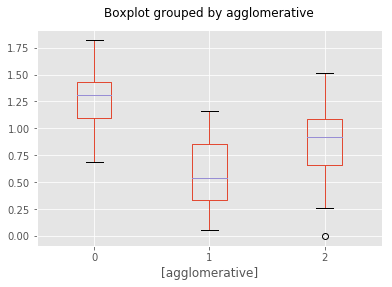

In [65]:
df_boxplot = wh2.filter(['Economy (GDP per Capita)', 'agglomerative'], axis=1)

plt.style.use('ggplot')
df_plt = df_boxplot.sort_values(by=['agglomerative'])
fig = df_plt.boxplot(by=['agglomerative'])
fig.set_title('')

The boxplot above shows that group 0 had the highest values, 1 had the lowest and 2 was inbetween which agrees with the previous observations. The groups seem to have a relatively similar range between their quartiles none of which are particularly condense.

In [66]:
agg1 = []
agg2 = []
agg3 = []
y = 0
labels_true = wh['Happiness Score']
while y < agglomerative.size - 1:
    if agglomerative[0][y] == 0:
        agg1.append(y)
    elif agglomerative[0][y] == 1:
        agg2.append(y)
    else:
        agg3.append(y)
    y = y + 1

count = 0
agg_mean_1 = 0
agg_mean_2 = 0
agg_mean_3 = 0
while count < len(labels_true):
    if count in agg1:
        agg_mean_1 += labels_true[count]
    elif count in agg2:
        agg_mean_2 += labels_true[count]
    else:
        agg_mean_3 += labels_true[count]
    count = count + 1

avg_agg1 = agg_mean_1 / len(agg1)
avg_agg2 = agg_mean_2 / len(agg2)
avg_agg3 = agg_mean_3 / len(agg3)
print("The average Happiness Score for cluster 0: ")
print(avg_agg1)
print("The average Happiness Score for cluster 1: ")
print(avg_agg2)
print("The average Happiness Score for cluster 2: ")
print(avg_agg3)

The average Happiness Score for cluster 0: 
6.430056338028168
The average Happiness Score for cluster 1: 
4.037066666666666
The average Happiness Score for cluster 2: 
5.170025


The Happiness Scores again coincide with what our predictor variables Family and GDP per Capita would have predicted. The purple cluster 0 group has the highest average Happiness Score at 6.43005633. The Happiness Scores were lower on average than the k-means model. Overall, the agglomerative model seemed to perform worse than k-means.

### Affinity Propagation 

In [67]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh3)
affinity = pd.DataFrame(clust_labels2)
wh3.insert((wh3.shape[1]),'affinity',affinity)

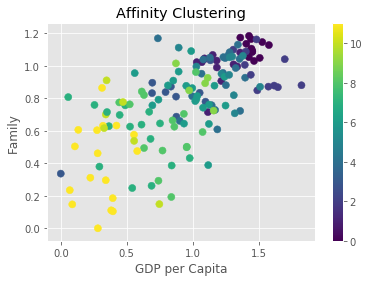

In [68]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh3['Economy (GDP per Capita)'],wh3['Family'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Family')
plt.colorbar(scatter)

In [69]:
# split df into cluster groups
df_heat_aff = wh3.filter(['Economy (GDP per Capita)', 'affinity'], axis=1)
aff_grouped = df_heat_aff.groupby(['affinity'], sort=True)
# compute average for each cluster
aff_means = aff_grouped.mean()
aff_means

,Economy (GDP per Capita)
affinity,
0,1.455180
1,1.177498
2,1.534246
3,0.804742
4,1.174852
5,1.251541
6,0.980124
7,0.533903
8,0.789336


In [70]:
# split df into cluster groups
df_heat_aff_f = wh3.filter(['Family', 'affinity'], axis=1)
aff_grouped_f = df_heat_aff_f.groupby(['affinity'], sort=True)
# compute average for each cluster
aff_means_f = aff_grouped_f.mean()
aff_means_f

,Family
affinity,
0,1.109004
1,0.993244
2,0.970941
3,0.791271
4,0.929518
5,0.956373
6,0.810490
7,0.577557
8,0.613209


The output above shows how the average GDP per Capita changes with the different groups in the affinity propagation clustering algorithm as well as the Family values.

From the tables, I can see that the correlations tend decrease with the group numbers. Cluster 0 is the only cluster with a Family and GDP per Capita value over 1.0.

Text(0.5, 1.0, '')

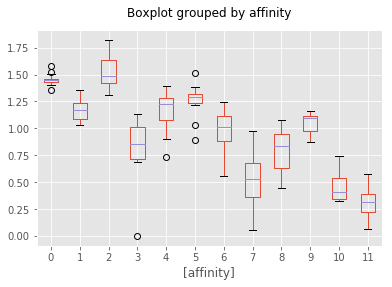

In [71]:
df_boxplot = wh3.filter(['Economy (GDP per Capita)', 'affinity'], axis=1)

plt.style.use('ggplot')
df_plt = df_boxplot.sort_values(by=['affinity'])
fig = df_plt.boxplot(by=['affinity'])
fig.set_title('')

The box plot shows that groups 0, 1, 2, 4, 5, and 9 performed with an average over 1.00. Cluster 0, 2, 5, and 9 have very small differences between their quartiles which means the clusters were very small in area and rather condense. This could be because of the relatively low amounts of datapoints and yet a relatively large number of clusters at 12. Clusters 6 and 7 have very large differences between their quartiles given the size of each cluster is small.

### Gaussian Mixture Modeling

In [72]:
def doGMM(X, nclust=3):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh4,3)
gmm = pd.DataFrame(clust_labels3)
wh4.insert((wh4.shape[1]),'gmm',gmm)

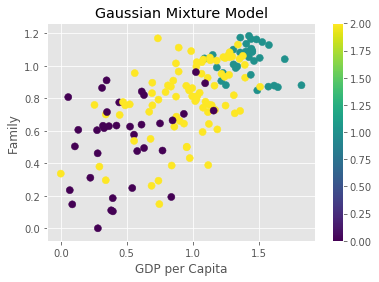

In [73]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh4['Economy (GDP per Capita)'],wh4['Family'],
                     c=gmm[0],s=50)
ax.set_title('Gaussian Mixture Model')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Family')
plt.colorbar(scatter)

Purple - 0  
Blue - 1  
Yellow - 2  

In [74]:
# split df into cluster groups
df_heat_gmm = wh4.filter(['Economy (GDP per Capita)', 'gmm'], axis=1)
grouped_gmm = df_heat_gmm.groupby(['gmm'], sort=True)
# compute average for each cluster
gmm_means = grouped_gmm.mean()
gmm_means

,Economy (GDP per Capita)
gmm,
0,0.491089
1,1.420811
2,0.962900


In [77]:
# split df into cluster groups
df_heat_gmm_f = wh4.filter(['Family', 'gmm'], axis=1)
grouped_gmm_f = df_heat_gmm_f.groupby(['gmm'], sort=True)
# compute average for each cluster
gmm_means_f = grouped_gmm_f.mean()
gmm_means_f

,Family
gmm,
0,0.550404
1,1.032736
2,0.800816


The output above shows how the average GDP per Capita changes with the different groups in the Gaussian Mixture Modeling algorithm as well as the Family values.

From the tables, I can see that group 1 had the highest correlation between the two which was the blue group that also appeared to be the best in the graphical output. Cluster 0 (purple) had the lowest average GDP per Capita and Family which makes sense from the graphical representation. The other cluster (yellow - 2) for has values between the previous two groups which makes sense from the graphical representation.

Text(0.5, 1.0, '')

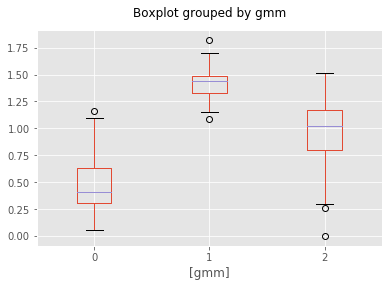

In [81]:
df_boxplot = wh4.filter(['Economy (GDP per Capita)', 'gmm'], axis=1)

plt.style.use('ggplot')
df_plt = df_boxplot.sort_values(by=['gmm'])
fig = df_plt.boxplot(by=['gmm'])
fig.set_title('')

The boxplot for the Gaussian Mixture Model showed that clusters 1 and 2 had a correlation above 1.00. Cluster 1 had a small range between its quartiles and appears to be relatively condense. The other two both have much larger ranges.

In [82]:
gmm1 = []
gmm2 = []
gmm3 = []
y = 0
labels_true = wh['Happiness Score']
while y < gmm.size - 1:
    if wh4['gmm'][y] == 0:
        gmm1.append(y)
    elif wh4['gmm'][y] == 1:
        gmm2.append(y)
    else:
        gmm3.append(y)
    y = y + 1

count = 0
gmm_mean_1 = 0
gmm_mean_2 = 0
gmm_mean_3 = 0
while count < len(labels_true):
    if count in gmm1:
        gmm_mean_1 += labels_true[count]
    elif count in gmm2:
        gmm_mean_2 += labels_true[count]
    else:
        gmm_mean_3 += labels_true[count]
    count = count + 1

avg_gmm1 = gmm_mean_1 / len(gmm1)
avg_gmm2 = gmm_mean_2 / len(gmm2)
avg_gmm3 = gmm_mean_3 / len(gmm3)
print("The average Happiness Score for cluster 0: ")
print(avg_gmm1)
print("The average Happiness Score for cluster 1: ")
print(avg_gmm2)
print("The average Happiness Score for cluster 2: ")
print(avg_gmm3)

The average Happiness Score for cluster 0: 
4.045228571428572
The average Happiness Score for cluster 1: 
6.862117647058824
The average Happiness Score for cluster 2: 
5.403540229885057


The averages show that cluster 1 had the highest Happiness Scores which coincides with the prediction attributes GDP per Capita and Family. Cluster 0 was also relatively low which means the Guassian mixture model did a good job of predicting the extremes and putting them into the correct cluster. From the measures taken, it appears that the Guassian model outperformed the other three. More to come in the conclusion.

## Conclusion

### Summary of Results

**k-means**    
GDP per Capita mean value:  

* Purple (cluster 0) - 0.553709 
* Blue (cluster 1) - 1.341650
* Yellow (cluster 2) - 0.982444

Family:  

* Purple (cluster 0) - 0.559753  
* Blue (cluster 1) - 1.012502  
* Yellow (cluster 2) - 0.816056  

Happiness Score:

* Purple (cluster 0) - 4.065708333333332 
* Blue (cluster 1) - 6.837652173913042
* Yellow (cluster 2) - 5.455193548387095

**Agglomerative**    
GDP per Capita mean value:  

* Purple (cluster 0) - 1.256579  
* Blue (cluster 1) - 0.576628
* Yellow (cluster 2) - 0.850429  

Family:  

* Purple (cluster 0) - 0.985823   
* Blue (cluster 1) - 0.563832
* Yellow (cluster 2) - 0.716721  


Happiness Score:

* Purple (cluster 0) - 6.430056338028168
* Blue (cluster 1) - 4.037066666666666
* Yellow (cluster 2) - 5.170025

**Affinity Propagation**  
GDP per Capita mean value:  

* cluster 0 	1.455180
* cluster 1 	1.177498
* cluster 2 	1.534246
* cluster 3 	0.804742
* cluster 4 	1.174852
* cluster 5 	1.251541
* cluster 6 	0.980124
* cluster 7 	0.533903
* cluster 8 	0.789336
* cluster 9 	1.042376
* cluster 10	0.465258
* cluster 11	0.303342

Family: 

* cluster 0 	1.109004
* cluster 1 	0.993244
* cluster 2 	0.970941
* cluster 3 	0.791271
* cluster 4 	0.929518
* cluster 5 	0.956373
* cluster 6 	0.810490
* cluster 7 	0.577557
* cluster 8 	0.613209
* cluster 9	    0.880584
* clutser 10	0.614645
* cluster 11	0.396308

**Gaussian Mixture Modeling**  
GDP per Capita mean value:  

* Purple (cluster 0) - 0.491089  
* Blue (cluster 1) - 1.420811
* Yellow (cluster 2) - 0.962900  

Family:  

* Purple (cluster 0) - 0.550404  
* Blue (cluster 1) - 1.032736
* Yellow (cluster 2) - 0.800816  

Happiness Score:

* Purple (cluster 0) - 4.045228571428572
* Blue (cluster 1) - 6.862117647058824
* Yellow (cluster 2) - 5.403540229885057

The boxplots and Happiness Score evaluation metrics both show that the Gaussian Mixture Model does the best job of clustering. The Gaussian model achieved the highest Happiness Score, Family, and GDP per Capita with blue cluster (cluster 1). This means it did the best job of finding a strongly correlated group. The Gaussian Mixture Model also has the lowest valued cluster (purple cluster 0). This also means it did the best job of finding the lower Family and GDP per Capita which in turn lead to a low Happiness Score for that cluster. The k-means and Gaussian Mixture models also had two groups that had an average above 1.0 on the boxplot. The agglomerative algorithm seemed perform the worst, aside from perhaps affinity propagation. The affinity propagation algorithm has 12 clusters, but from the sse vs number of clusters plot I can see that 3 clusters is supposed to be optimal. Thus, the other three models performed the best for clustering the dataset. 

In each model, there are certain clusters that I would conclude to be the be the highest correlation which have the highest Family and GDP per Capita scores. From the original plot of the data in the Exploratory Data Analysis section, Economy (GDP per Capita) and then Family were seen to be the best predictors of the Happiness Score. Thus, when both values are high it is more likely that the Happiness Score would be high. The highest valued cluster by averaging the GDP per Capita and Family would produce the cluster that contains instances with the highest chance of having a high Happiness score. The overall best clusters in the dataset are the blue (cluster 1) from the Gaussian Mixture Model, and cluster 0 from affinity propagation (given the affinity model had 11 clusters so the highest cluster can be more of an outlier). By contrast, the clusters with the lowest Family and GPA per Capita scores are clusters that are likely to have the lowest Happiness Score. In the dataset the lowest scores were also in the Gaussian Mixture model with cluster 0 (purple). 

In further experiments, I would look to test more attributes to see how the clusters differ. Life Expectancy was the third best predictor of Happiness Score so it would be interesting to see how adding another dimension to the cluster models would affect the outcome. I would like to experiment with a larger dataset as this one only had 157 items. I think it is harder to make a consistent model with such few items in the dataset. Having a limited dataset is one of the reasons why three clusters is considered optimal as the models won't cluster outliers which could be the case in the affinity propagation model. 